Name: Yvonne Ryan
    
Student ID: 21208298

## E-tivity 1: Manual gradient descent

In this E-tivity, we will be looking at fitting data to a polynomial, using a manual *gradient descent* approach. This is an important approach that will be fundamental to our neural network models when we get to them later.

Please skim through the whole notebook before getting started, as some of the later tasks might influence your choice of design of the early parts.



Grading guidelines:

**Beginning [0-8]** Task 1 and 2 mostly complete: random data is generated based on a second degree polynomial, jittered, plotted and a loss function can numerically assess the error between actual and predicted outputs.

**Developing [9-12]** Beginning + Task 3 and 4 mostly complete: gradients are calculated and used to update a random model that reduces loss. Gradient descent is implemented, but may not converge towards an acceptable solution. Some of the requested plots may be missing.

**Accomplished [13-16]** Developing + gradient descent properly converges towards a solution and all requested plots are provided.

**Exemplary [17-20]** Accomplished + Task 5 demonstrated on a 3rd order polynomial example.


To implement the tasks add cells to the notebook in the appropriate places. Marks will be deducted if the notebook cannot be exexcuted using "Run All".

**To complete the e-tivity submit your notebook with the code for Tasks 1-5. Do not post Task 5 to gitlab.**

### Task 1 - Generating some data

We're not going to take any pre-existing data set. Instead, we're going to generate our own data, so we will know exactly what the formula behind it is. We will then start from a random (bad) model and try to fit it to the data as best as we can.

- Start by choosing coefficients for a second degree polynomial equation ($ax^2+bx+c$) that will distribute the data you will try to model. That polynomial will be the ideal solution. For example, given respective values of $(2,-4,1)$ for $(a,b,c)$, our base polynomial is: $$y=2x^2-4x+1$$
- Implement an evaluation function for any second degree polynomial, which, given a set of coefficients and a given input $x$ returns the corresponding $y$.
- Now in order to simulate imperfect/noisy data, write a jittery evaluation function for any polynomial, which, for a given set of coefficients, a given input $x$ and an extra jitter parameter $j$ returns not the corresponding $y$ value but a random value in the interval: $[y-j, y+j]$.
- Generate some data by generating 100 random $x$ values in the $[-10,10]$ interval and calling your jittery evaluation function on them. Store those matching $x$ and $y$ values as you see fit.
- Finally, using matplotlib, plot that training data.

**Tip: numpy array processing:**

In this E-tivity, you will be manipulating not single numbers but arrays of numbers. It is strongly recommended that you use numpy arrays for that kind of data, and take advantage of in-built array processing for your functions. See the example below for a square function that can seemlessly be used on single values or numpy arrays:

In [2]:
%matplotlib inline 
import numpy as np

# this square function will work just fine if x is a numpy array
def my_square_function(x):
    return x*x

# testing single values
print( my_square_function( 2 ) )
print( my_square_function( 3 ) )
print( my_square_function( 9 ) )

# testing multiple values: numpy array first, then standard python tuple
print( my_square_function( np.array([2, 3, 9]) ) ) # works
try:
    print( my_square_function( [2, 3, 9] ) )       # doesn't work
except TypeError:
    print( "TypeError detected" )

4
9
81
[ 4  9 81]
TypeError detected


Importing the numpy module as 'np' is a typical convention that you will often find in other people's code. Finally, while you likely won't require much more from numpy for this particular E-tivity, feel free to look up some documentation/tutorials if you're curious: it's a key Python module that you're likely to use a lot over time.

[Would you like to know more?](https://jakevdp.github.io/PythonDataScienceHandbook/02.02-the-basics-of-numpy-arrays.html)

**Tip: generating random numbers:**

You will need a way to generate random numbers. A simple way to do that is through the **random** module whose *random.random()* function will return you a random value between 0 and 1 using a uniform distribution. Simply multiply that by a maximum value and you will get a random number between 0 and your maximum.

The **numpy** module also has its own random functions, which directly support arrays. The *numpy.random.rand(n)* function will return an array of $n$ random values between 0 and 1. Again, we can simply multiply that array by a maximum value to convert all $[0,1]$ interval values to the $[0,maximum]$ interval.

In [3]:
## random numbers examples

import random

print( "Random value 0-1: " + str( random.random() ) )
print( "Random value 0-1: " + str( random.random() ) )
print( "Random value 0-1: " + str( random.random() ) )
print( "Random value 0-100: " + str( random.random() * 100 ) )
print( "Random value 0-100: " + str( random.random() * 100 ) )
print( "Random value 0-100: " + str( random.random() * 100 ) )

import numpy as np

print( "10 random values 0-1" + str( np.random.rand(10) ))
print( "10 random values 0-1" + str( np.random.rand(10) ))
print( "10 random values 0-1" + str( np.random.rand(10) ))
print( "10 random values 0-100" + str( np.random.rand(10) * 100 ))
print( "10 random values 0-100" + str( np.random.rand(10) * 100 ))
print( "10 random values 0-100" + str( np.random.rand(10) * 100 ))

Random value 0-1: 0.1673306479413953
Random value 0-1: 0.4856898578164901
Random value 0-1: 0.21424880844956207
Random value 0-100: 80.26388250699456
Random value 0-100: 30.99550523088498
Random value 0-100: 60.52731614059503
10 random values 0-1[0.70855193 0.05276187 0.05094299 0.28214109 0.86419052 0.89356955
 0.59800195 0.4527402  0.4131124  0.39978678]
10 random values 0-1[0.13265366 0.40410237 0.4558918  0.5414374  0.84177419 0.43341531
 0.49766528 0.40944101 0.38737668 0.99691646]
10 random values 0-1[0.28977876 0.44533138 0.19774436 0.00422112 0.92396791 0.0550674
 0.98139448 0.13440883 0.58539757 0.38897766]
10 random values 0-100[11.60501598 54.73091425 47.1237057  50.04486399 74.18903097 98.31779176
  3.20616756 11.55905875 43.06749214 43.75539387]
10 random values 0-100[50.27581355 11.27417601 46.00925642 47.88463876 22.05811019 76.58203532
  3.73468726 95.97622933 94.94730344 97.30194254]
10 random values 0-100[ 5.52303975 75.92576509 95.44394993 16.02511166 69.39919206 46.

**Tip: basic plotting with matplotlib:**

The *matplotlib.pyplot()* function will be your basic plotting device. Simply call it with two matching sets of numbers, the first being the $x$ values and the second being the $y$ values. Then, an optional third parameter is used to define what you want to draw using those points. The two letter codes in the example below show you how the first character determines a colour ('b' for blue, 'r' for red, 'g' for green) and the second one the type of graphic object to draw ('-' for a line, 'o' for big dots, '+' for crosses). Note how you can overlay multiple plots together before rendering to screen.

[Would you like to know more?](https://matplotlib.org/tutorials/introductory/pyplot.html)

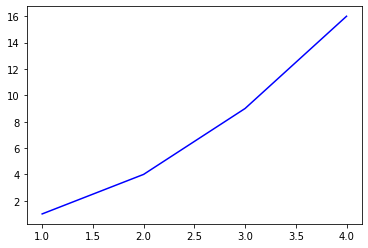

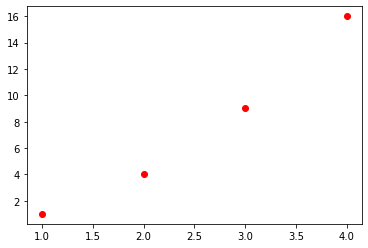

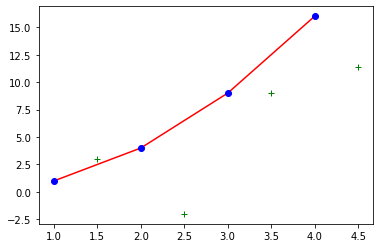

In [4]:
# matplotlib pyplot, basic plotting
import matplotlib.pyplot as plt

# blue line
plt.plot([1,2,3,4], [1,4,9,16], 'b-')
plt.show()

# red dots
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.show()

# red line, blue dots and green crosses
plt.plot([1,2,3,4], [1,4,9,16], 'r-')
plt.plot([1,2,3,4], [1,4,9,16], 'bo')
plt.plot([1.5,2.5,3.5,4.5], [3,-2,9,11.4], 'g+')
plt.show()

## Task 2 - Loss

- Generate and store random coefficients for a second degree polynomial ($y=ax^2+bx+c$), this will be your model, which you will aim to improve until it fits the data well enough.
- Calculate your model's predicted $\bar{y}$ output values from the Task 1 training data $x$ input values.
- For all the training $x$ values, plot both actual values (the $y$ values from the training data) and the predicted values (the $\bar{y}$ values from your model) on the same graph, to get an immediate visualisation of how good (or more likely how bad) your current model is.
- Implement a loss function, which, given actual values and predicted values, returns the mean squared error. This provides you with a quantified evaluation of how bad the model is: the lower the loss, the better the model.

**Tip: Mean Squared Error (MSE):**

The MSE is the mean value of the sum of squared differences between actual and predicted outputs. So for input values $x_1,\dots,x_n$, with actual outputs $y_1,\dots,y_n$ and predicted values $\bar{y}_1$ to $\bar{y}_n$, the MSE $E$ is: $$E=\frac{1}{n}\sum\limits_{i=1}^{n}{(y_i-\bar{y}_i)^2}$$

**Tip: Numpy (again):**

Numpy arrays have handy methods to be summed up, mean'ed, etc. Using these may spare you some manual loops.

## Task 3 - Gradient calculation and loss reduction

In order to make your model fit the data better, you want to modify its $a$, $b$ and $c$ coefficients so that the error decreases. That means you first need to know how each coefficient affects the error. We can achieve this by calculating the partial derivative of your loss function with respect to each indifidual coefficient.

In our case, our loss function is the MSE, so this is the function we will want to calculate partial derivatives on:
$$E=\frac{1}{n}\sum\limits_{i=1}^{n}{(y_i-\bar{y}_i)^2}$$

With:
$$\bar{y}_i = ax_i^2+bx_i+c$$

So we can reformulate our loss as:
$$E=\frac{1}{n}\sum\limits_{i=1}^{n}{(y_i-(ax_i^2+bx_i+c))^2}$$

In this specific case, our partial derivatives for that loss function are the following:

- Partial derivative with respect to $a$:
$$\frac{dE}{da}=\frac{-2}{n}\sum\limits_{i=1}^{n}{x_i^2(y_i-(ax_i^2+bx_i+c))}$$

- Partial derivative with respect to $b$:
$$\frac{dE}{db}=\frac{-2}{n}\sum\limits_{i=1}^{n}{x_i(yi-(ax_i^2+bx_i+c))}$$

- Partial derivative with respect to $c$:
$$\frac{dE}{dc}=\frac{-2}{n}\sum\limits_{i=1}^{n}{(y_i-(ax_i^2+bx_i+c))}$$

If you calculate the value of each derivatives when filling up all other variables, what you get is the $gradients$ for your coefficients. These are the values that give you the slope of the loss function with regards to each specific coefficient, indicating whether you should increase or decrease it to reduce the loss, and also by how much it should be safe to do so.

Given coefficients $a$, $b$ and $c$, calculated gradients $g_a$, $g_b$ and $g_c$ and a learning rate $lr$, you typically would update your coefficients so that their new, updated values are defined as below:

$$a_{new}=a-lr\times g_a$$
$$b_{new}=b-lr\times g_b$$
$$c_{new}=c-lr\times g_c$$

If you apply that new model to the data, your loss should have decreased.

- Decide on a learning rate to start with. It should be a small value, try starting with $0.0001$ but feel free to experiment with different values.
- Implement a gradient calculation function which, given a second degree polynomial's coefficients, as well as a set of inputs $x$ and a corresponding set of actual outputs $y$ will return the respective gradients for each coefficient.
- Check the loss of your current model, call your gradient calculation function, adjust your model's coefficients accordingly, and check that the updated model's loss is smaller.
- Check this improvement visually by plotting training data, original model and updated model on a same plot.

## Task 4 - Gradient descent

All the pieces are in place to converge onto a solution and you can finish implementing your gradient descent.:

- Iterate over the following steps:
    - evaluate current model loss
    - calculate gradients
    - adjust model coefficients
    - calculate new model loss
- As you do so, store the loss at each step or every $n$ steps.
- Choose and implement a condition to decide when to stop iterating, and return the final results when that condition is met.
- Plot both your actual $x$ and $y$ training data and your $x$ and $\bar{y}$ predicted data, and see how your final model fares. Print out the final coefficients: they shouldn't be too far off the ones you used to generate the data originally.
- Plot the loss value over iterations.

## Task 5 - Gradient descent: All of the polynomials!

If you've reach this point, well done! You have implemented your own gradient descent approach to fitting a second degree polynomial to any given data set. As a final step, see if you can take the challenge a bit further by adapting your code to polynomial models of any arbitrary degree.

For a polynomial of any order, using the MSE as loss function, the generic formula for the gradient $g_k$ of the coefficient of the $k^{th}$ degree is the following:
$$g_k=\frac{-2}{n}\sum\limits_{i=1}^{n}{x_i^k(y_i-\bar{y}_i)}$$

With this in mind, see if you can implement a new codebase that will try to fit a polynomials of any degree instead of being hard coded to the second degree.

Note that you may need to work on a smaller data interval, for example $[-2,2]$ and with small coefficients, in order to avoid running into overflow errors. While your code should be generic and theoretically cover polynomials of any given order, it's good enough if you can demonstrate that it works on a 3rd order polynomial example.

## Solution

First, import NumPy and Matplotlib modules and define all functions.

In [5]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def add_jitter(y_vals, j):
    '''Add pseudorandom noise (i.e. jitter) to a 1D array.
    
    Inputs:
        y_vals -- 1D array of coordinates to add noise to
        j -- Jitter parameter
    Returns:
        Array of noisy coordinates
    '''
    try:
        # Create an array of ones the same shape as array of y values
        j_vals = np.ones_like(y_vals)
        
        # Multiply each element in new array by a random no. in range [-j, +j]
        for i in range(0,len(j_vals)):
            j_vals[i] *= (np.random.rand() * 2*j) - j

        # Add the random values to the y values & return
        return y_vals + j_vals

    except Error as e:
        print('Error creating jitter array: {}'.format(e))  
        
        
def compute_poly(poly, x):
    '''Evaluates a single-variable polynomial for a given value of x.
    
    Inputs:
        poly -- List of coefficient, power tuples of form 
                    [(1st coeff., 1st power), ..., (nth coeff., nth power)]
        x -- NumPy array of input values to poly function
    Returns:
        run_total -- NumPy array of poly function outputs corresponding to each input value in x
    '''
    try:
        # Evaluate each term in the polynomial and add it to a running total
        run_total = 0
        for term in poly:
            run_total += term[0] * x ** term[1]

        return run_total

    except Error as e:
        print('Error evaluating polynomial: {}'.format(e))     
    

def quad_poly(coeff_bound):
    '''Generates a quadratic polynomial with random coefficients.
        
    Inputs:
        coeff_bound -- Max. possible magnitude of each coefficient, i.e. -coeff_bound <= coeff. <= coeff_bound
    Returns:
        List of tuples
    '''
    try:
        # Generate 3 random coefficients for polynomial terms
        coeffs = [(np.random.rand() * (coeff_bound*2)) - coeff_bound for n in range(0,3)]
    
        # Construct & return a 2nd order polynomial with these coefficients
        return [(coeffs[0],2),(coeffs[1],1),(coeffs[2],0)]
    
    except Error as e:
        print('Error creating polynomial: {}'.format(e))    
    

def least_squares(actual,predicted):
    '''Calculates the Least Squares Error of predicted values vs. actual values.
        
    Inputs:
        actual -- NumPy array of actual y values (i.e. output we are trying to predict)
        predicted -- NumPy array of predicted y values
    Returns:
        Least Squares Error of predicted values vs. actual values.
    '''    
    try:
        # Calculate & return least squares error
        return np.mean((actual - predicted)**2)
    
    except Error as e:
        print('Error calculating LSE: {}'.format(e))
        
        
def update_coeffs(model, x, y):
    '''Update coefficients of a polynomial using partial derivative of Least Squares Error per coefficient.
        
    Inputs:
        model -- Polynomial represented as list of coefficient, power tuples of form 
                    [(1st coeff., 1st power), ..., (nth coeff., nth power)]
        x -- NumPy array of input values to model
        y -- NumPy array of actual outputs that model aims to approximate
    Returns:
        updated_poly -- Polynomial with coefficients updated to give lower LSE than the original input poly
    ''' 
    
    def LSE_partial_deriv(model, x, y):
        '''Calculates partial derivative of Least Squares Error function w.r.t. each polynomial coefficient.

        Returns:
            partial_deriv -- NumPy array of partial derivative w.r.t. each coefficient
        ''' 

        sum_terms = np.zeros((len(model),len(x)))

        for i in range(0,len(model)):
            for j in range(0,len(x)):
                sum_term = (x[j]**model[i][1])*y[j] - model[0][0]*(x[j]**(model[i][1]+2)) - model[1][0]*(x[j]**(model[i][1]+1)) - model[2][0]*(x[j]**model[i][1])
                sum_terms[i][j] = sum_term

        partial_deriv = (-2/len(x)) * np.sum(sum_terms, axis=1)

        return partial_deriv    
    
    lr = 0.0001
    
    partial_deriv = LSE_partial_deriv(model, x, y)
    
    updated_model = []
    for i in range(0,len(model)):
        updated_model.append((model[i][0] - (lr * partial_deriv[i]), model[i][1]))
    
    return updated_model

### Task 1 solution - Generating some data

Polynomial chosen: $f(x) = 2x^2 - 3x + 1$

This is represented in Python as a list of tuples: [(2, 2), (-3, 1), (1, 0)]

In [7]:
# Define a polynomial to use as the 'true curve'
true_poly = [(2,2),(-3,1),(1,0)]

# Set jitter parameter
j = 20

# Generate x & y values
x = np.arange(-10,10,0.2)
y_true = compute_poly(true_poly, x)
y_train = add_jitter(y_true, j)

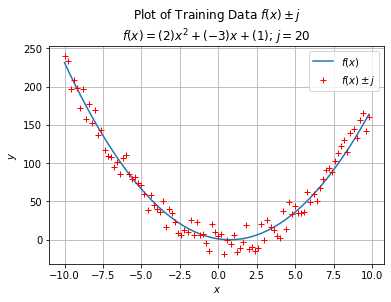

In [8]:
# Plot the training data & the 'true curve' it is based on
fig1 = plt.figure()
plt.plot(x, y_true, label='$f(x)$')
plt.plot(x, y_train,'r+', label='$f(x) \pm j$')

plt.title('Plot of Training Data $f(x) \pm j$\n$f(x) = ({})x^2 + ({})x + ({})$; $j = {}$'.format(true_poly[0][0], true_poly[1][0], true_poly[2][0], j))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid()

plt.show()

### Task 2 solution - Loss

In [9]:
# Define the model
model = quad_poly(coeff_bound=250)
y_model = compute_poly(model, x)

# Calculate the least squares error
lse_original = least_squares(y_train, y_model)
print('LSE of random model: {}'.format(lse_original))

LSE of random model: 1531405.8818705596


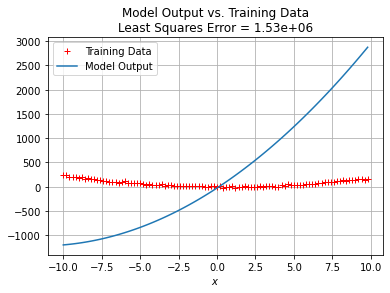

In [10]:
# Plot the model & training data for comparison
fig1 = plt.figure()
plt.plot(x, y_train,'r+', label='Training Data')
plt.plot(x, y_model, label='Model Output')

plt.title('Model Output vs. Training Data\nLeast Squares Error = {:.3}'.format(lse_original))
plt.xlabel('$x$')
plt.legend()
plt.grid()

plt.show()

### Task 3 solution - Gradient calculation and loss reduction

- Partial derivative with respect to $a$:
$$\frac{dE}{da}=\frac{-2}{n}\sum\limits_{i=1}^{n}{x_i^2(y_i-(ax_i^2+bx_i+c))}$$

- Partial derivative with respect to $b$:
$$\frac{dE}{db}=\frac{-2}{n}\sum\limits_{i=1}^{n}{x_i(yi-(ax_i^2+bx_i+c))}$$

- Partial derivative with respect to $c$:
$$\frac{dE}{dc}=\frac{-2}{n}\sum\limits_{i=1}^{n}{(y_i-(ax_i^2+bx_i+c))}$$

In [11]:
# Update model coefficients using gradients
updated_model = update_coeffs(model, x, y_train)
y_model_updated = compute_poly(updated_model, x)

# Compare loss of original model with updated model
lse_updated = least_squares(y_train, y_model_updated)
print('LSE of random model: {}\nLSE of updated model: {}'.format(lse_original, lse_updated))

if lse_updated <= lse_original:
    print('=> model has IMPROVED!')
else:
    print('=> model has NOT IMPROVED :(')    

LSE of random model: 1531405.8818705596
LSE of updated model: 1473202.0753284267
=> model has IMPROVED!


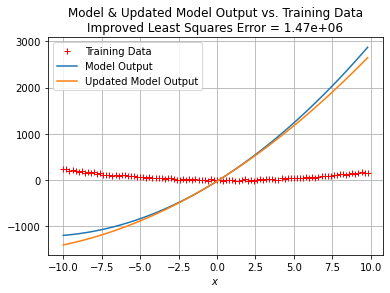

In [12]:
# Plot the original model, updated model & training data for comparison
fig1 = plt.figure()
plt.plot(x, y_train,'r+', label='Training Data')
plt.plot(x, y_model, label='Model Output')
plt.plot(x, y_model_updated, label='Updated Model Output')

plt.title('Model & Updated Model Output vs. Training Data\nImproved Least Squares Error = {:.3}'.format(lse_updated))
plt.xlabel('$x$')
plt.legend()
plt.grid()

plt.show()

### Task 4 solution - Gradient descent


In [14]:
# Calculate LSE of true curve vs. training data
lse_true = least_squares(y_train, y_true)

lse_list = [lse_original]
while lse_updated > lse_true:    
    lse_list.append(lse_updated)
    
    # Update model coefficients using gradients
    updated_model = update_coeffs(updated_model, x, y_train)
    y_model_updated = compute_poly(updated_model, x)

    # Compare loss of original model with updated model
    lse_updated = least_squares(y_train, y_model_updated)

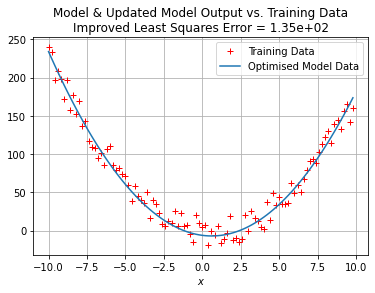

In [19]:
# Plot the optimised model & training data for comparison
fig1 = plt.figure()
plt.plot(x, y_train,'r+', label='Training Data')
plt.plot(x, y_model_updated, label='Optimised Model Data')

plt.title('Model & Updated Model Output vs. Training Data\nImproved Least Squares Error = {:.3}'.format(lse_updated))
plt.xlabel('$x$')
plt.legend()
plt.grid()

plt.show()

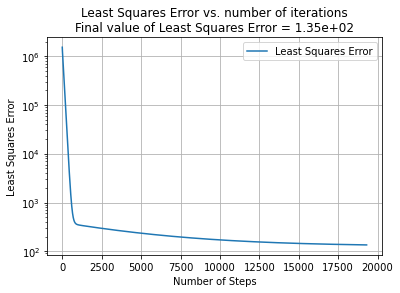

In [22]:
# Plot the LSE for each iteration vs. number of iterations
fig1 = plt.figure()
plt.semilogy(np.arange(0,len(lse_list)), lse_list, label='Least Squares Error')

plt.title('Least Squares Error vs. number of iterations\nFinal value of Least Squares Error = {:.3}'.format(lse_updated))
plt.xlabel('Number of Steps')
plt.ylabel('Least Squares Error')
plt.legend()
plt.grid()

plt.show()